# Supervised Learning - Mini Project

## Group 4

1. Pragadeesh Sekar
2. Yashwin Krishnakanth
3. Praneeth Namasivayam

In [1]:
import pandas as pd

In [2]:
data = pd.read_excel("Bank_Personal_Loan_Modelling-1-1-1.xlsx","Data")
data = data.set_index("ID", drop = True)

In [3]:
data.head(5)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 546.9 KB


### Observation:
No missing values

In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


### Observation
Minimum value of experience shows negative value of (-3). Since experience cant be in negative we are considering the absolute values of it

In [6]:
data["Experience"] = abs(data["Experience"])

In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


# Observation on data - Plotting Continuous Variables

In [8]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

Text(0.5,1,'Mortgage Distribution')

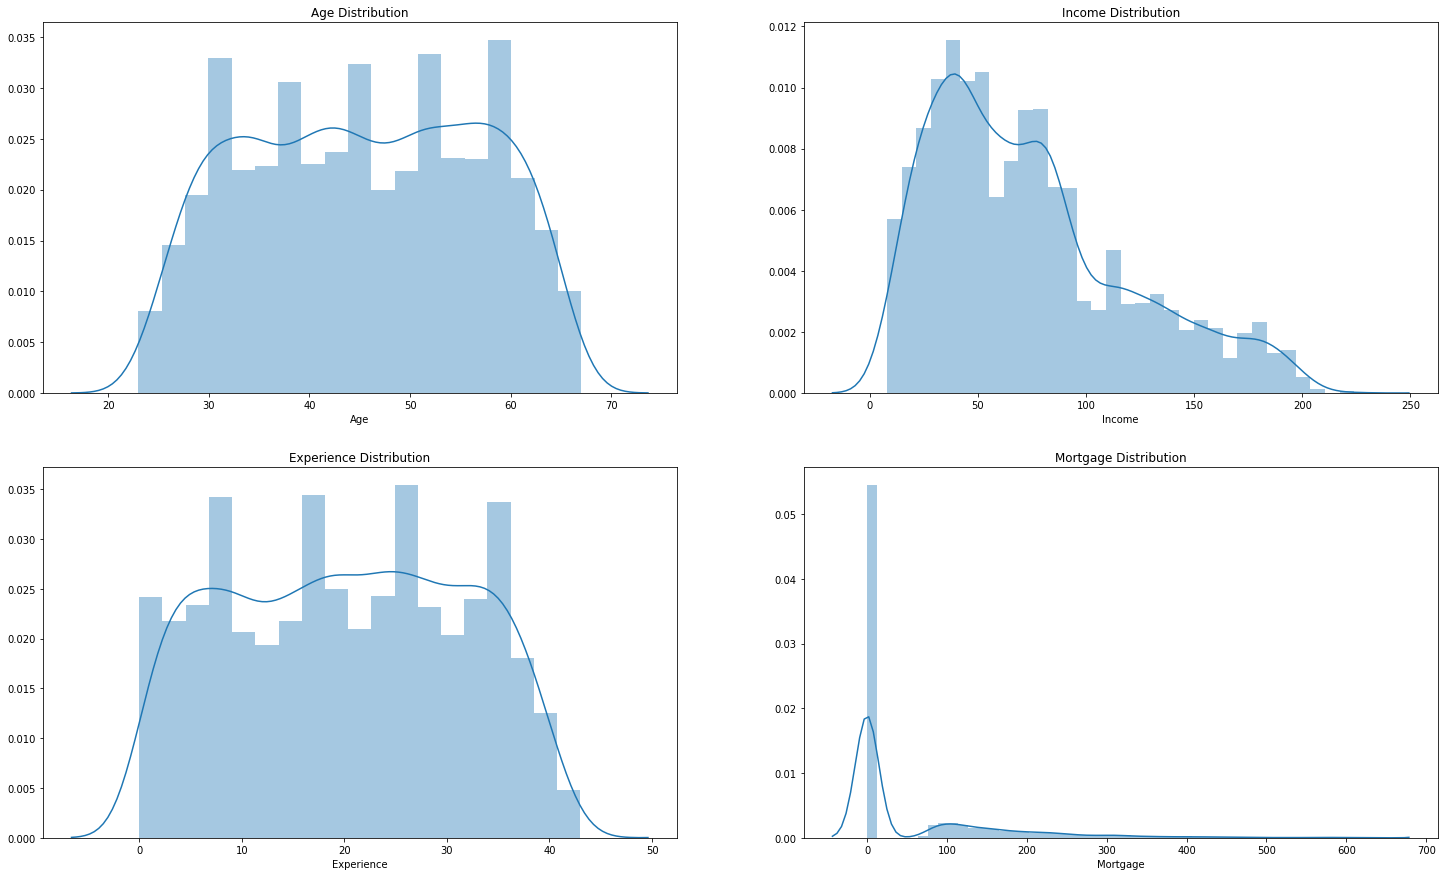

In [9]:
fig = plt.figure(figsize=(25,15))
fig.add_subplot(2,2,1)
sns.distplot(data.Age, label='Age').set_title("Age Distribution")
fig.add_subplot(2,2,2)
sns.distplot(data.Income, label='Income').set_title("Income Distribution")
fig.add_subplot(2,2,3)
sns.distplot(data.Experience, label='Experience').set_title("Experience Distribution")
fig.add_subplot(2,2,4)
sns.distplot(data.Mortgage, label='Mortgage').set_title("Mortgage Distribution")

### Observations:
1. Significant range of age distribution : 25 to 65 
2. Significant range of income distribution : 10K to 95K
3. Significant range of experience distribution : 5 to 35 years
4. Significant range of mortgage distribution : 100K to 300K years

In [10]:
colList = data.columns.tolist()
colList

['Age',
 'Experience',
 'Income',
 'ZIP Code',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Personal Loan',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

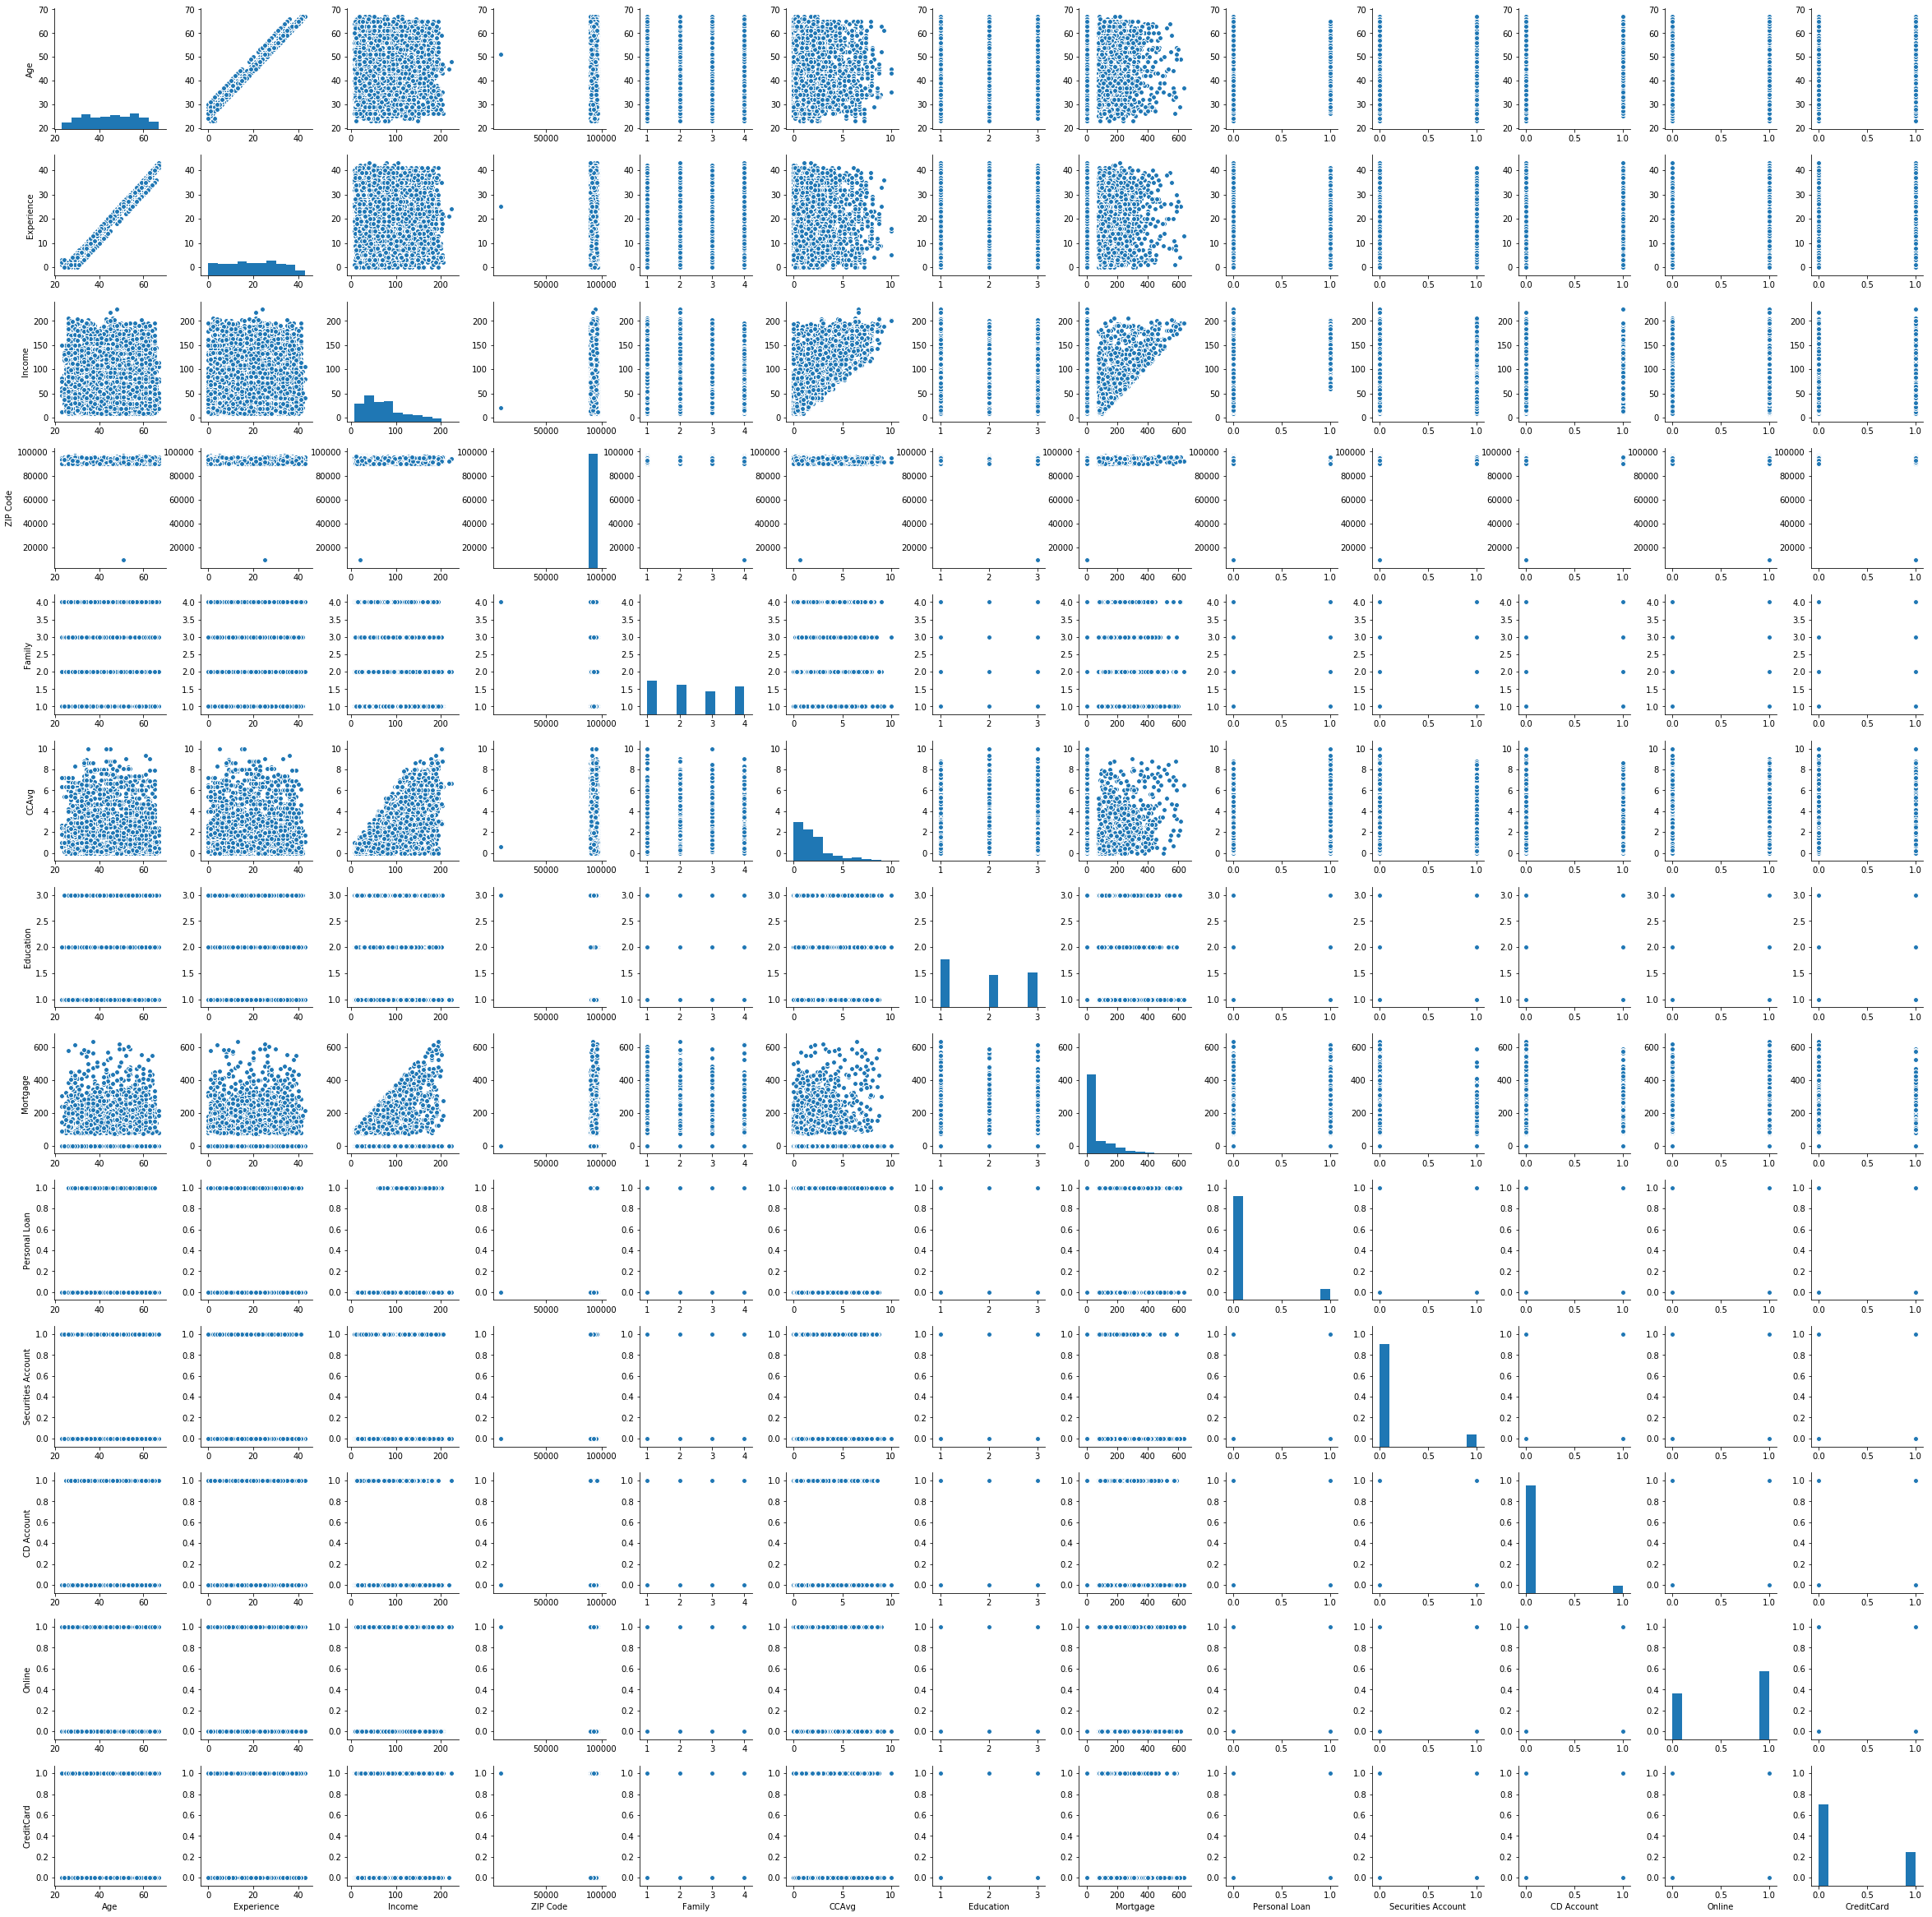

In [11]:
sns.pairplot(data[colList])

## Comparison of people availed personal loan across education level 

/usr/local/anaconda/python3/lib/python3.6/site-packages/seaborn/categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


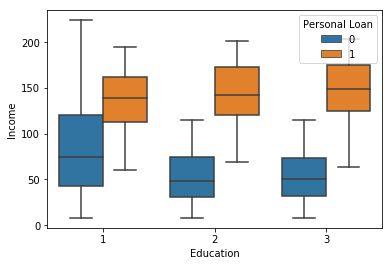

In [12]:
sns.boxplot(x="Education", y="Income", hue="Personal Loan", data=data)

###  Observation:
All the 3 levels of educated people with different levels of income availed personal loan  

/usr/local/anaconda/python3/lib/python3.6/site-packages/seaborn/categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


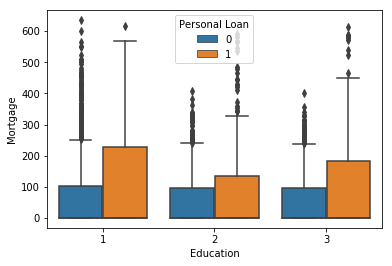

In [13]:
sns.boxplot(x="Education", y="Mortgage", hue="Personal Loan", data=data)

/usr/local/anaconda/python3/lib/python3.6/site-packages/seaborn/categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


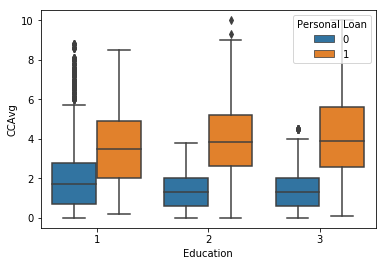

In [14]:
sns.boxplot(x="Education", y="CCAvg", hue="Personal Loan", data=data)

In [15]:
areaWiseDist = data[data['Personal Loan'] == 1]['ZIP Code'].value_counts()

In [16]:
areaWiseDist.head(5)

94720    19
94305    13
92093     9
90095     8
90089     8
Name: ZIP Code, dtype: int64

### Observation:
Top 5 areas based on availing personal loan offer 

In [17]:
import numpy as np
meanFamilySizeNoPL = np.mean(data[data['Personal Loan'] == 0]['Family'])
print('mean Family size of people without Personal Loan: %s' % meanFamilySizeNoPL)
meanFamilySizewPL = np.mean(data[data['Personal Loan'] == 1]['Family'])
print('mean Family size of people with Personal Loan: %s' % meanFamilySizewPL)

mean Family size of people without Personal Loan: 2.3734513274336284
mean Family size of people with Personal Loan: 2.6125


### Observation:
Both PL category have (approximately) same family size mean

## Frequency plots of categorical columns across data w.r.t Personal Loan  

In [18]:
cat_features = ['Family', 'Education','Securities Account', 'CD Account', 'Online', 'CreditCard']
for i in cat_features:
    data[i] = data[i].astype('category')

In [19]:
for catCol in cat_features:
    print("Values in %s column are: {%s}"%(catCol, data[catCol].unique().tolist()))

Values in Family column are: {[4, 3, 1, 2]}
Values in Education column are: {[1, 2, 3]}
Values in Securities Account column are: {[1, 0]}
Values in CD Account column are: {[0, 1]}
Values in Online column are: {[0, 1]}
Values in CreditCard column are: {[0, 1]}


/usr/local/anaconda/python3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


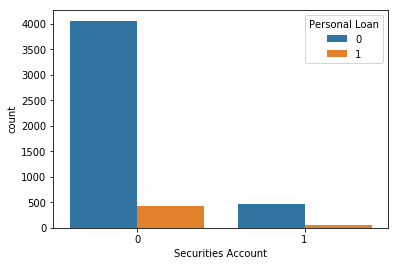

In [20]:
sns.countplot(x = data['Securities Account'], data=data, hue='Personal Loan')

/usr/local/anaconda/python3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

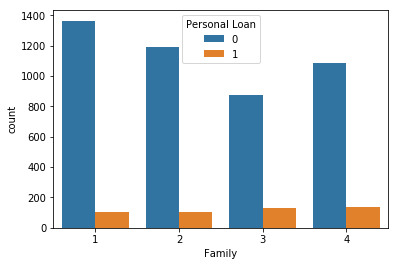

In [21]:
sns.countplot(x = data['Family'], data=data, hue='Personal Loan')
data['Family'].value_counts()

/usr/local/anaconda/python3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


0    4698
1     302
Name: CD Account, dtype: int64

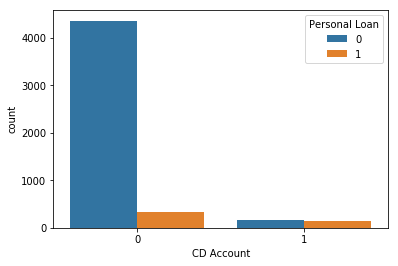

In [22]:
sns.countplot(x = data['CD Account'], data=data, hue='Personal Loan')
data['CD Account'].value_counts()

/usr/local/anaconda/python3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


0    3530
1    1470
Name: CreditCard, dtype: int64

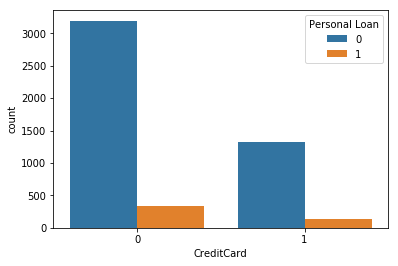

In [23]:
sns.countplot(x = data['CreditCard'], data=data, hue='Personal Loan')
data['CreditCard'].value_counts()

/usr/local/anaconda/python3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


1    2984
0    2016
Name: Online, dtype: int64

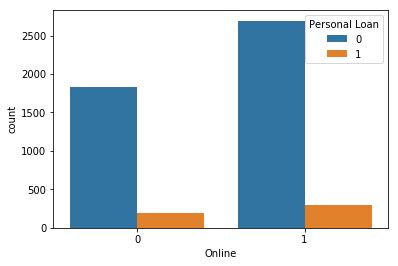

In [24]:
sns.countplot(x = data['Online'], data=data, hue='Personal Loan')
data['Online'].value_counts()

## Distribution plot of CCAvg by Personal Loan

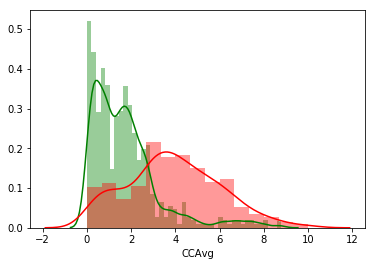

In [25]:
sns.distplot(data[data['Personal Loan'] == 0].CCAvg, color='g')
sns.distplot(data[data['Personal Loan'] == 1].CCAvg, color='r')

## Correlation chart using heatmap

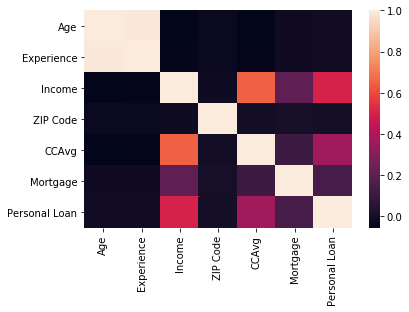

In [26]:
sns.heatmap(data.corr())

In [27]:
data.corr()

,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Personal Loan
Age,1.000000,0.993991,-0.055269,-0.029216,-0.052030,-0.012539,-0.007726
Experience,0.993991,1.000000,-0.046876,-0.028936,-0.049750,-0.011097,-0.008304
Income,-0.055269,-0.046876,1.000000,-0.016410,0.645993,0.206806,0.502462
ZIP Code,-0.029216,-0.028936,-0.016410,1.000000,-0.004068,0.007383,0.000107
CCAvg,-0.052030,-0.049750,0.645993,-0.004068,1.000000,0.109909,0.366891
Mortgage,-0.012539,-0.011097,0.206806,0.007383,0.109909,1.000000,0.142095
Personal Loan,-0.007726,-0.008304,0.502462,0.000107,0.366891,0.142095,1.000000


### Observation: 
1. Age & Experience data have high correlation. But their association with Personal Account is very less. So, we are ignoring both the features for building the model
2. Income and CCAvg data have significant positive correlation between them. Hence, only one of the features is selected for the model. We selected Income.                    

## Categorical feature selection using chisquare contingency

In [28]:
from scipy import stats
import scipy as sp
col_list = []
for column in cat_features:
    value=sp.stats.chi2_contingency(pd.crosstab(data[column], data['Personal Loan']))
    if value[1]<0.05:
        col_list.append(column)

In [29]:
col_list # column list that have association with response variable (Personal Loan)

['Family', 'Education', 'CD Account']

In [30]:
#Checking association among the selected independent variables (Family, Education, CD Account)
value1 = sp.stats.chi2_contingency(pd.crosstab(data['Family'], data['CD Account']))
print(value1[1])
value2 = sp.stats.chi2_contingency(pd.crosstab(data['Family'], data['Education']))
print(value2[1])

0.018167630053315165
7.287678569906194e-34


### Observation: 
From the above p-values, we can infer that Family and Education are not indepedent. So, we selected Education alone for the model.

# Implementing models

In [31]:
X = data[['Income', 'Education', 'CD Account']]
Y = data[['Personal Loan']]
X.shape
#Y.shape

(5000, 3)

In [32]:
from sklearn.model_selection import train_test_split

test_size = 0.30
seed = 11
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = seed)

### Logistic Regression

In [33]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model1 = LogisticRegression()
model1.fit(X_train, Y_train)
y_predict = model1.predict(X_test)
model_score = model1.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test, y_predict))

0.9473333333333334
[[1341   13]
 [  66   80]]


/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
print(metrics.classification_report(Y_test,y_predict))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1354
          1       0.86      0.55      0.67       146

avg / total       0.94      0.95      0.94      1500



### Naives Bayes Model

In [35]:
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()
model2.fit(X_train, Y_train)
y_predict = model2.predict(X_test)
print(metrics.accuracy_score(Y_test, y_predict))
print(metrics.confusion_matrix(Y_test, y_predict))

0.916
[[1304   50]
 [  76   70]]


/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
print(metrics.classification_report(Y_test,y_predict))

             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1354
          1       0.58      0.48      0.53       146

avg / total       0.91      0.92      0.91      1500



### KNN Model 

In [37]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors= 5, weights = 'uniform', metric='euclidean')
model3.fit(X_train, Y_train)
y_predict = model3.predict(X_test)
print(metrics.accuracy_score(Y_test, y_predict))
print(metrics.confusion_matrix(Y_test, y_predict))

0.956
[[1347    7]
 [  59   87]]


/usr/local/anaconda/python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
print(metrics.classification_report(Y_test,y_predict))

             precision    recall  f1-score   support

          0       0.96      0.99      0.98      1354
          1       0.93      0.60      0.72       146

avg / total       0.95      0.96      0.95      1500



### Support Vector Machine

In [39]:
from sklearn import svm
model4 = svm.SVC(kernel = 'linear', C=1)
model4.fit(X_train, Y_train)
y_predict = model4.predict(X_test)
print(metrics.accuracy_score(Y_test, y_predict))
print(metrics.confusion_matrix(Y_test, y_predict))

/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9526666666666667
[[1345    9]
 [  62   84]]


In [40]:
print(metrics.classification_report(Y_test,y_predict))

             precision    recall  f1-score   support

          0       0.96      0.99      0.97      1354
          1       0.90      0.58      0.70       146

avg / total       0.95      0.95      0.95      1500



# Conclusion:
We choose KNN for this data, as both the precision and recall values are high for predicting 1s (avails personal loan) compared to other algoriths